# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | minas de marcona
Processing Record 5 of Set 1 | kingston
Processing Record 6 of Set 1 | grand falls-windsor
Processing Record 7 of Set 1 | claveria
Processing Record 8 of Set 1 | cockburn town
Processing Record 9 of Set 1 | tazacorte
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | dakhla
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | igarka
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | sao tome
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.86,95,80,2.94,CL,1726545706
1,port-aux-francais,-49.3500,70.2167,4.43,97,100,14.51,TF,1726545707
2,avarua,-21.2078,-159.7750,25.03,78,56,4.12,CK,1726545709
3,minas de marcona,-15.2119,-75.1103,12.30,79,5,3.81,PE,1726545710
4,kingston,17.9970,-76.7936,30.53,74,20,6.69,JM,1726545543


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.86,95,80,2.94,CL,1726545706
1,port-aux-francais,-49.3500,70.2167,4.43,97,100,14.51,TF,1726545707
2,avarua,-21.2078,-159.7750,25.03,78,56,4.12,CK,1726545709
3,minas de marcona,-15.2119,-75.1103,12.30,79,5,3.81,PE,1726545710
4,kingston,17.9970,-76.7936,30.53,74,20,6.69,JM,1726545543


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

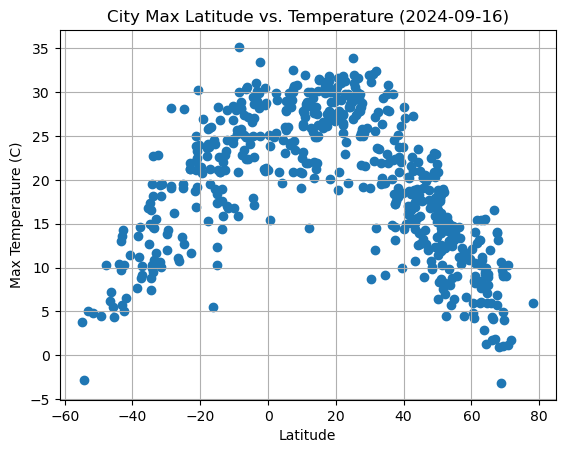

In [11]:
# Build scatter plot for latitude vs. temperature
latvtemp = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-09-16)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

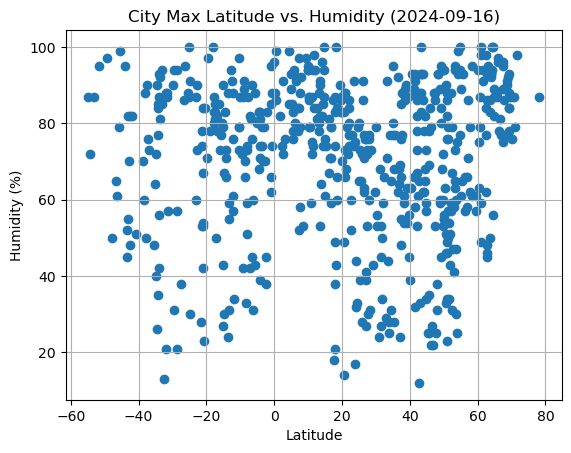

In [12]:
# Build the scatter plots for latitude vs. humidity
latvhum = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2024-09-16)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

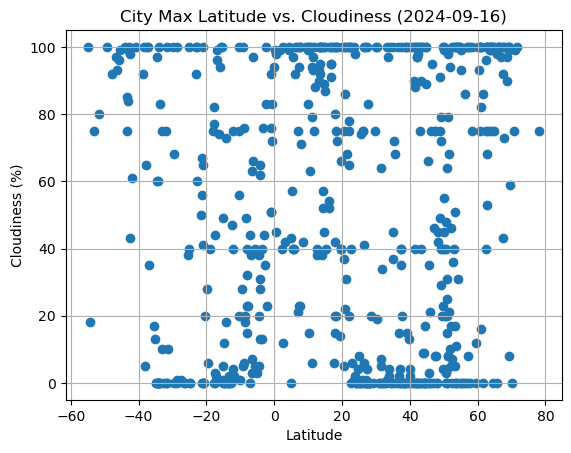

In [14]:
# Build the scatter plots for latitude vs. cloudiness
latvcloud = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2024-09-16)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

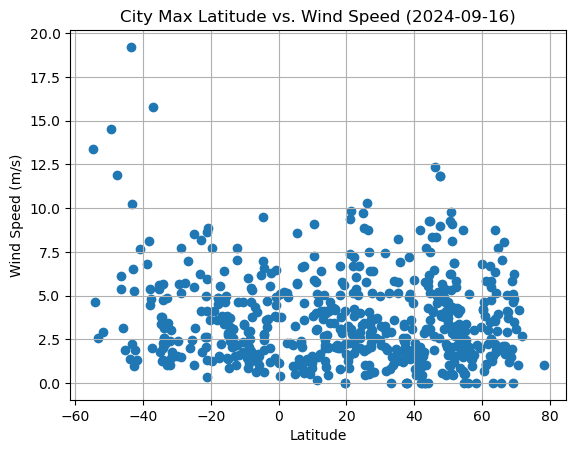

In [15]:
# Build the scatter plots for latitude vs. wind speed
latvwind = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2024-09-16)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Perform linear regression using scipy.stats.linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate predicted values
    y_pred = slope * x + intercept
    
    # Create scatter plot
    plt.scatter(x, y)  # Removed color definition for data points
    
    # Plot the linear regression line
    plt.plot(x, y_pred, color='red')  # Removed label for the regression line
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the equation in red text at the bottom left of the plot
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.05, equation_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='bottom', color='red')  # Increased font size
    
    # Show plot
    plt.show()
    
    # Print the R² value separately
    print(f'The r²-value is: {r_value**2}')

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
norhem = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
norhem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kingston,17.9970,-76.7936,30.53,74,20,6.69,JM,1726545543
5,grand falls-windsor,48.9332,-55.6649,16.95,89,49,4.93,CA,1726545712
6,claveria,18.6074,121.0832,28.86,84,100,5.75,PH,1726545713
7,cockburn town,21.4612,-71.1419,29.09,79,68,9.81,TC,1726545714
8,tazacorte,28.6290,-17.9293,21.54,73,20,2.57,ES,1726545715


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
sohem = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
sohem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.86,95,80,2.94,CL,1726545706
1,port-aux-francais,-49.3500,70.2167,4.43,97,100,14.51,TF,1726545707
2,avarua,-21.2078,-159.7750,25.03,78,56,4.12,CK,1726545709
3,minas de marcona,-15.2119,-75.1103,12.30,79,5,3.81,PE,1726545710
9,hermanus,-34.4187,19.2345,8.78,85,60,3.79,ZA,1726545716


###  Temperature vs. Latitude Linear Regression Plot

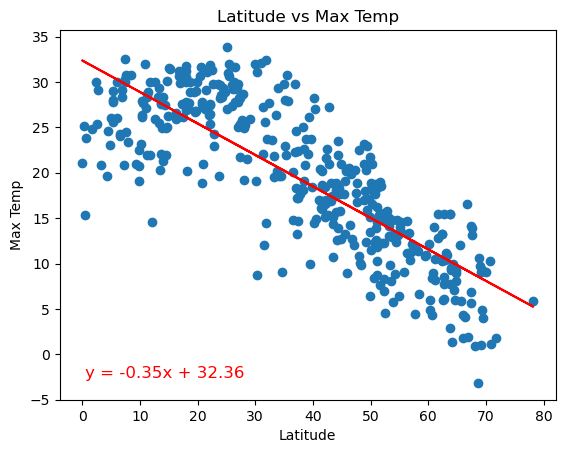

The r²-value is: 0.6641496891436981


In [32]:
# Linear regression on Northern Hemisphere
# create_linear_regression_plot(x, y, x_label, y_label, title)
create_linear_regression_plot(norhem["Lat"], norhem["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

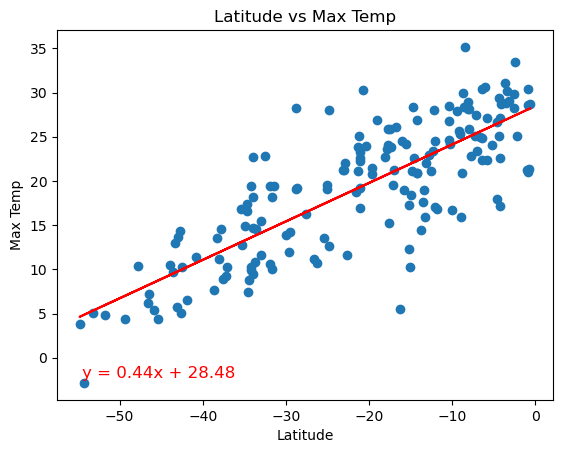

The r²-value is: 0.6494830853298765


In [33]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(sohem["Lat"], sohem["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

**Discussion about the linear relationship:** The closer the latitude is to zero, the higher the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

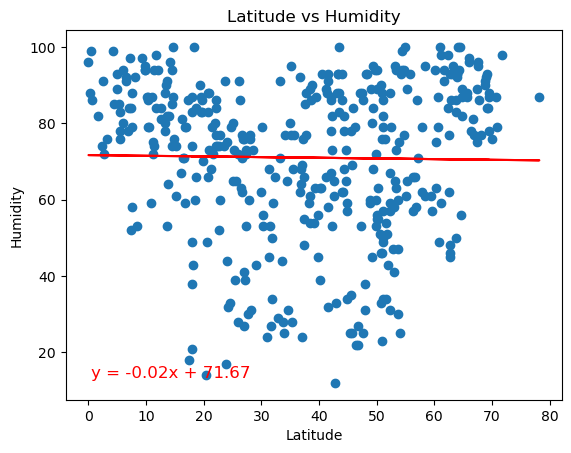

The r²-value is: 0.0002648307761099279


In [35]:
# Northern Hemisphere
create_linear_regression_plot(norhem["Lat"], norhem["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

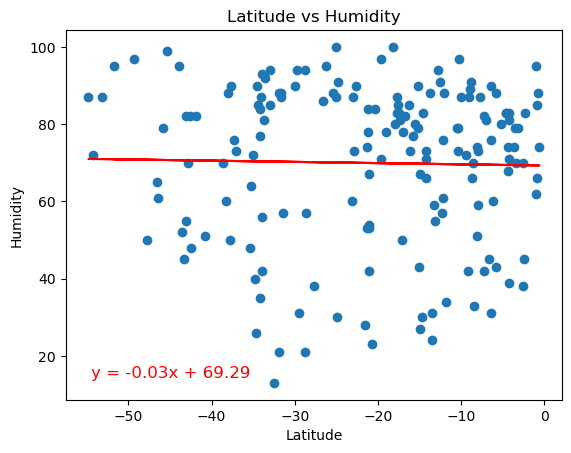

The r²-value is: 0.00045662444067154324


In [36]:
# Southern Hemisphere
create_linear_regression_plot(sohem["Lat"], sohem["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

**Discussion about the linear relationship:** There is not really a strong relationship between the latitude of a city and its humidity level.

### Cloudiness vs. Latitude Linear Regression Plot

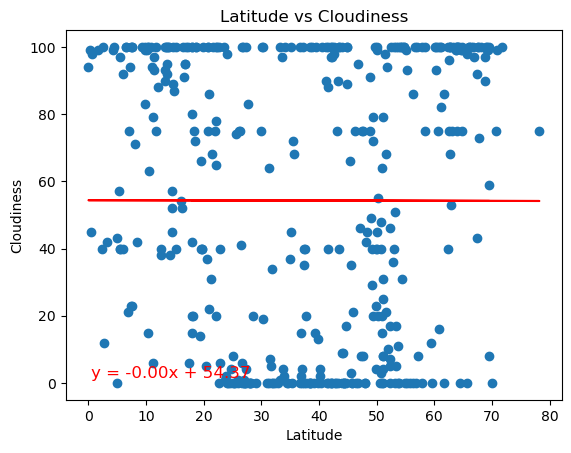

The r²-value is: 1.8254567345297798e-06


In [37]:
# Northern Hemisphere
create_linear_regression_plot(norhem["Lat"], norhem["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

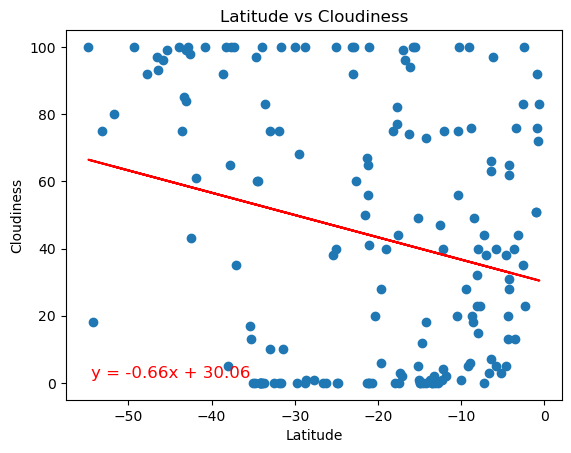

The r²-value is: 0.05862987372830933


In [38]:
# Southern Hemisphere
create_linear_regression_plot(sohem["Lat"], sohem["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

**Discussion about the linear relationship:** There isn't a linear relationship between latitude and cloudiness for the northern hemisphere. However, for the southern hemisphere, it appears that the further south the latitude of the city, the more likely it is to be cloudy.

### Wind Speed vs. Latitude Linear Regression Plot

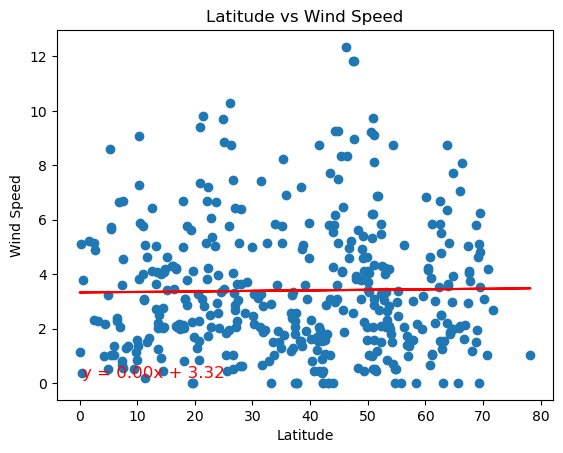

The r²-value is: 0.0002403135866332353


In [39]:
# Northern Hemisphere
create_linear_regression_plot(norhem["Lat"], norhem["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

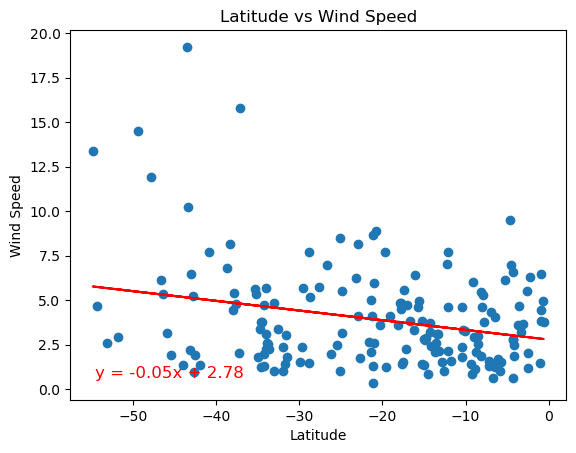

The r²-value is: 0.0704050152893978


In [40]:
# Southern Hemisphere
create_linear_regression_plot(sohem["Lat"], sohem["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

**Discussion about the linear relationship:** It appears that the further away from zero the latitude of the city is, the more likely it is that the city will have higher wind speeds. However, this relationship is a bit more noticeable in cities located in the southern hemisphere.